<a href="https://colab.research.google.com/github/laxmisingh01/knn_ai-kosh/blob/main/knn_classification%26regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("UDIDDATA_0.csv")


In [2]:
#for classification
y = df["disability_type_name"]
X = df.drop(columns=["disability_type_name"])

#for regression
y = df["total_count"]
X = df.drop(columns=["total_count"])


In [3]:
#seperating Categorical & Numerical Columns
cat_cols = ["state_name", "district_name", "age_group"]
num_cols = ["male_count", "female_count"]

In [4]:
#encoding the categorical columns and scaling numerical colums
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])


In [5]:
#training and split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


KNN classification

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

pipe = Pipeline([
    ("prep", preprocess),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.13990626627321645


KNN regression

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

pipe = Pipeline([
    ("prep", preprocess),
    ("knn", KNeighborsRegressor(n_neighbors=5))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE:", rmse)



RMSE: 107.5052802278179


K vs accuracy plot for both


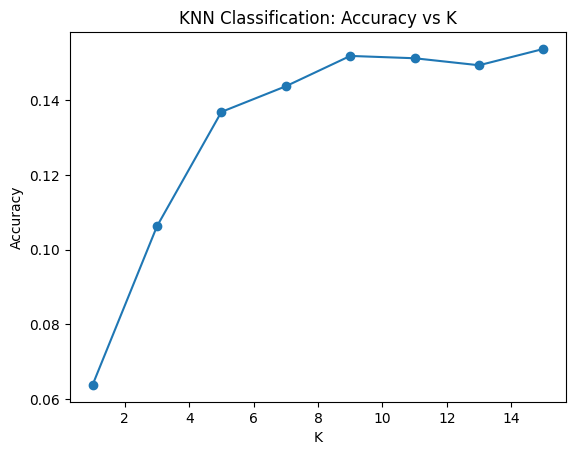

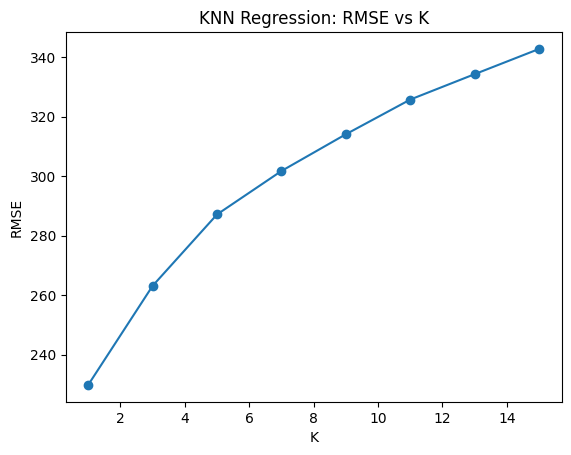

In [11]:

# KNN: Accuracy vs K and RMSE vs K

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# ----------------------------
# Load dataset
# ----------------------------
df = pd.read_csv("/content/UDIDDATA_0.csv")

# OPTIONAL: sample for speed
df = df.sample(8000, random_state=42)

cat_cols = ["state_name", "district_name", "age_group"]
num_cols = ["male_count", "female_count"]

X = df[cat_cols + num_cols]

# Preprocessing pipeline
preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

# K values to try
k_values = list(range(1, 16, 2))

# ====================================================
# 1️⃣ CLASSIFICATION — Predict disability type
# ====================================================

y_class = df["disability_type_name"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

acc_scores = []

for k in k_values:
    pipe = Pipeline([
        ("prep", preprocess),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    acc_scores.append(accuracy_score(y_test, preds))

# Plot Accuracy vs K
plt.figure()
plt.plot(k_values, acc_scores, marker='o')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN Classification: Accuracy vs K")
plt.show()


# ====================================================
# 2️⃣ REGRESSION — Predict total_count
# ====================================================

y_reg = df["total_count"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

rmse_scores = []

for k in k_values:
    pipe = Pipeline([
        ("prep", preprocess),
        ("knn", KNeighborsRegressor(n_neighbors=k))
    ])

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    rmse_scores.append(rmse)

# Plot RMSE vs K
plt.figure()
plt.plot(k_values, rmse_scores, marker='o')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("KNN Regression: RMSE vs K")
plt.show()
